# Characters Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

In [32]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  1.0.1


In [33]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [34]:
ID = 1234
np.random.seed(ID)

In [35]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [36]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [61 63 77 52 68 55 48 53 62 61]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [61 63 77 52 68 55 48 53 62 61]


In [37]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


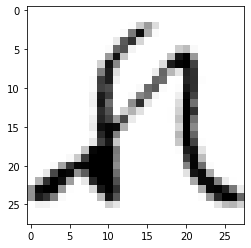

LABEL: 8
INPUT:


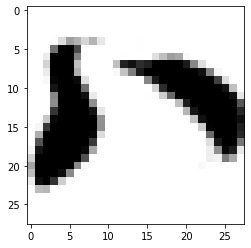

LABEL: 5
INPUT:


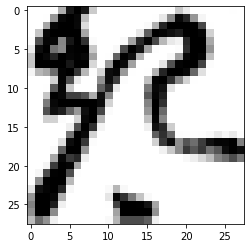

LABEL: 1


In [38]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [39]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,),(50,), (20,20,),(5,50,),(5,25,50), (40,20,10), ]}

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

grid=GridSearchCV(estimator=mlp, param_grid=parameters, return_train_score=True)
#ADD YOUR CODE
grid.fit(X_train, y_train)
df=pd.DataFrame(grid.cv_results_)

print ('RESULTS FOR NN\n')

print("Best parameters set found: \n", grid.best_params_)
#ADD YOUR CODE

print("Score with best parameters:\n ", grid.best_score_)
#ADD YOUR CODE

print("\nAll scores on the grid:\n ", df)
#ADD YOUR CODE

C:\Users\germa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\germa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\germa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\germa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\germa\anaconda3\lib\site-packages\sklearn\neural_network\_multi

RESULTS FOR NN

Best parameters set found: 
 {'hidden_layer_sizes': (40,)}
Score with best parameters:
  0.7183333333333334

All scores on the grid:
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.313215      0.337966         0.002991        0.001277   
1       0.914810      0.054116         0.002210        0.000758   
2       1.360207      0.280000         0.003599        0.001855   
3       1.471991      0.210467         0.003203        0.000989   
4       0.888993      0.109963         0.002598        0.000491   
5       1.525004      0.462140         0.003811        0.001331   
6       1.559809      0.617013         0.003982        0.001086   
7       1.150398      0.416939         0.002397        0.000798   

  param_hidden_layer_sizes                                params  \
0                    (10,)         {'hidden_layer_sizes': (10,)}   
1                    (20,)         {'hidden_layer_sizes': (20,)}   
2                    (40,)         {'hidd

### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [40]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 64, 320, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)
mlp2=MLPClassifier(hidden_layer_sizes=grid.best_params_['hidden_layer_sizes'], max_iter=100,
                   alpha=1e-4, solver='sgd',tol=1e-4, random_state=ID, learning_rate_init=.1)
#ADD YOUR CODE

# recall to use cv=kf to use the k-fold subdivision seen in the lectures
grid2=GridSearchCV(estimator=mlp2, param_grid=parameters,cv=kf, return_train_score=True)
grid2.fit(X_train, y_train)
#ADD YOUR CODE
df2=pd.DataFrame(grid2.cv_results_)

print ('RESULTS FOR NN\n')

print("Best parameters set found: \n",grid2.best_params_)
#ADD YOUR CODE

print("Score with best parameters:\n ", grid2.best_score_)
#ADD YOUR CODE

print("\nAll scores on the grid: \n", df2)
#ADD YOUR CODE

C:\Users\germa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\germa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\germa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\germa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\germa\anaconda3\lib\site-packages\sklearn\neural_network\_multi

RESULTS FOR NN

Best parameters set found: 
 {'batch_size': 32}
Score with best parameters:
  0.7466666666666667

All scores on the grid: 
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      66.811197     18.159934         0.003994        0.002006   
1       0.963197      0.029605         0.002201        0.000399   
2       0.884606      0.026688         0.001998        0.000003   
3       1.011408      0.017654         0.002396        0.000488   
4       1.238403      0.083700         0.002600        0.000491   

  param_batch_size               params  split0_test_score  split1_test_score  \
0                1    {'batch_size': 1}           0.133333           0.116667   
1               32   {'batch_size': 32}           0.733333           0.766667   
2               64   {'batch_size': 64}           0.733333           0.741667   
3              320  {'batch_size': 320}           0.700000           0.725000   
4              480  {'batch_size': 480}           0.

### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

As we can see more number of layers does not neccesarily mean more accuracy, indeed our best result is shown for a one layer NN. Also again within that premise, bigger size also does not mean better results.
On the other hand batch sizes shows better results for low values even though the computaitonal timing is considerably large. We observe that in both changing the layers and the batches there are some procesing that did not converge within the 100 iteration.

## [ANSWER TO QUESTION 1]

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 1.28 sec

Training MLP of size (20,) ...
Done, training time: 1.26 sec

Training MLP of size (40,) ...
Done, training time: 1.51 sec

Training MLP of size (20, 20) ...
Done, training time: 1.39 sec

Training MLP of size (40, 20, 10) ...
Done, training time: 1.48 sec



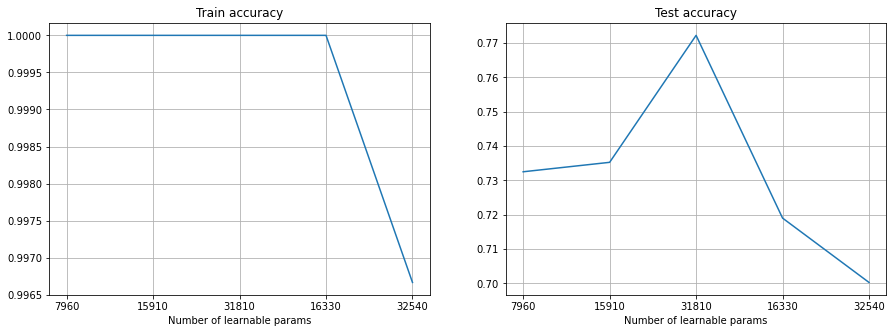

In [41]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (40,), (20,20,), (40,20,10)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(hidden_layer_sizes=hl_size,max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)
    
    mlp.fit(X_train, y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]
As we can observe there is overfitting since the training and test curves have different shapes. We see how while the training curve has the maximum accuracy for a large range of learnable parameters, the test curve just reach a maximum to drop again whithin that range. If the algorithm would not be overfitting, the training and thest cuves should have the same shape. The way on how the training curve shows a constant maximum accuracy to then drop and how the test curve have a spike form lead us to think that the algorithm is overfitting.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

C:\Users\germa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\germa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\germa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\germa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\germa\anaconda3\lib\site-packages\sklearn\neural_network\_multi

RESULTS FOR NN

Best parameters set found: 
 {'learning_rate_init': 0.02}
Score with best parameters:
  0.7150000000000001


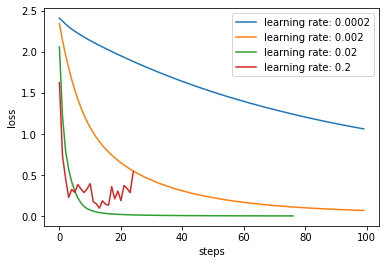

In [43]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]
scores = {'learning_rate_init':lr_list}
sc=[]
for lr in lr_list:
    mlp3=MLPClassifier(hidden_layer_sizes=grid.best_params_['hidden_layer_sizes'], max_iter=100,
                   alpha=1e-4, solver='sgd',tol=1e-4, random_state=ID, learning_rate_init=lr ,
                   batch_size= grid2.best_params_['batch_size'])
#ADD YOUR CODE
    mlp3.fit(X_train, y_train)
    plt.plot(mlp3.loss_curve_, label='learning rate: '+ str(lr))
    plt.legend()
plt.xlabel('steps')
plt.ylabel('loss')

mlp4=MLPClassifier(hidden_layer_sizes=grid.best_params_['hidden_layer_sizes'], max_iter=100,
                   alpha=1e-4, solver='sgd',tol=1e-4, random_state=ID,
                   batch_size= grid2.best_params_['batch_size'])

grid3=GridSearchCV(estimator=mlp4, param_grid=scores , return_train_score=True)
grid3.fit(X_train, y_train)
#df3=pd.DataFrame(grid3.cv_results_)
print ('RESULTS FOR NN\n')

print("Best parameters set found: \n", grid3.best_params_)
#ADD YOUR CODE

print("Score with best parameters:\n ",grid3.best_score_)
#ADD YOUR CODE


### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]
We note how appart from the 0.2 learning rate, which is unstable the rest show a stable curve. We can also see how from 0.02 the algorithm did not converge, reason why the best parametere choosen was 0.02. 
Apreciate how as we increase the learning rate the convercence time increases and therefore the curve is smoother.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.227250


Text(0, 0.5, 'loss')

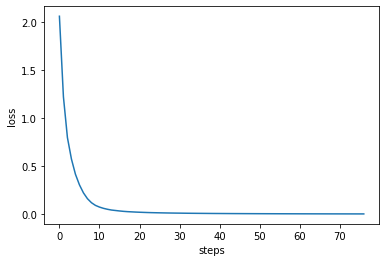

In [44]:
#get training and test error for the best NN model from CV
mlp5=MLPClassifier(hidden_layer_sizes=grid.best_params_['hidden_layer_sizes'], max_iter=1000,
                   alpha=1e-4, solver='sgd',tol=1e-4, random_state=ID,
                   batch_size= grid2.best_params_['batch_size'],
                   learning_rate_init= grid3.best_params_['learning_rate_init'])
mlp5.fit(X_train, y_train)

training_error=1-mlp5.score(X_train, y_train)

test_error = 1-mlp5.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

#ADD YOUR CODE FOR PLOTTING
plt.plot(mlp5.loss_curve_)
plt.xlabel('steps')
plt.ylabel('loss')

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [45]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [398 391 407 395 401 429 389 390 426 374]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [46]:
# use best architecture and params from before
mlp6=MLPClassifier(hidden_layer_sizes=grid.best_params_['hidden_layer_sizes'], max_iter=50,
                   alpha=1e-4, solver='sgd',tol=1e-4, random_state=ID,
                   batch_size= grid2.best_params_['batch_size'], verbose=True,
                   learning_rate_init= grid3.best_params_['learning_rate_init'])
mlp6.fit(X_train, y_train)
#ADD YOUR CODE
training_error=1-mlp5.score(X_train, y_train)

test_error = 1-mlp5.score(X_test, y_test)
print ('\nRESULTS FOR NN\n')

#get training and test error for the NN

#ADD YOUR CODE

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


Iteration 1, loss = 1.04748745
Iteration 2, loss = 0.50045856
Iteration 3, loss = 0.36372867
Iteration 4, loss = 0.27840573
Iteration 5, loss = 0.21762879
Iteration 6, loss = 0.16900290
Iteration 7, loss = 0.13512495
Iteration 8, loss = 0.10726523
Iteration 9, loss = 0.07782501
Iteration 10, loss = 0.06050204
Iteration 11, loss = 0.04835213
Iteration 12, loss = 0.03774974
Iteration 13, loss = 0.03117929
Iteration 14, loss = 0.02539446
Iteration 15, loss = 0.02123879
Iteration 16, loss = 0.01814600
Iteration 17, loss = 0.01580379
Iteration 18, loss = 0.01413592
Iteration 19, loss = 0.01280402
Iteration 20, loss = 0.01155407
Iteration 21, loss = 0.01046019
Iteration 22, loss = 0.00972938
Iteration 23, loss = 0.00891103
Iteration 24, loss = 0.00836680
Iteration 25, loss = 0.00782113
Iteration 26, loss = 0.00738286
Iteration 27, loss = 0.00693765
Iteration 28, loss = 0.00654684
Iteration 29, loss = 0.00622902
Iteration 30, loss = 0.00596722
Iteration 31, loss = 0.00569176
Iteration 32, los

C:\Users\germa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(



RESULTS FOR NN

NN training error: 0.222500
NN test error: 0.239571


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]
Even though the test error both cases are more or less the same we can observe a significant difference on the train error. As we can see the error for the test set on the small dataset is nearly 0 which as saw, lead to overfitting. For the large dataset, the train error is not zero but is quite similar to the test error which tell us that the fitting was better than for the small dataset.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


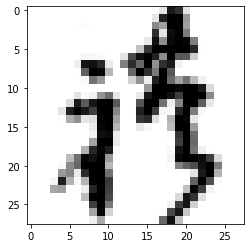

LABEL: 8


In [47]:
NN_prediction = mlp5.predict(X_train)
large_NN_prediction = mlp6.predict(X_train)

#ADD YOUR CODE
sem=True
i=0#i is going to be the index of the first misclassified sample
while sem:
    if NN_prediction[i]==large_NN_prediction[i]:
        i+=1
    else:
        sem=False
        i+=1
    
plot_input(X_train,y_train,i)        

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


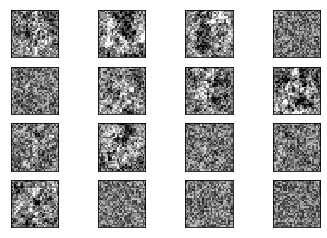

Weights with 4000 data points:


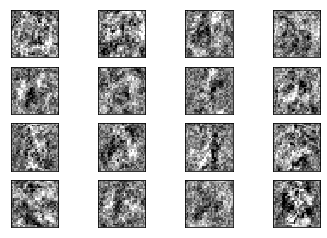

In [48]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp6.coefs_[0].min(), mlp6.coefs_[0].max()
for coef, ax in zip(mlp6.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]

Apparently for the large datasets the weights are more significant since we can apparently recognize some shapes on the plots. 

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [49]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting
rbf=SVC(kernel = 'rbf', C = 10, gamma = 0.01)
rbf.fit(X_train, y_train)

#ADD YOUR CODE

print ('RESULTS FOR SVM')

SVM_training_error =training_error=1-rbf.score(X_train, y_train)  #ADD YOUR CODE

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error =test_error = 1-rbf.score(X_test, y_test) #ADD YOUR CODE
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.0
Test score SVM:
0.08140000000000003


In [50]:
from sklearn import linear_model

logreg=linear_model.LogisticRegression(C=1)#ADD YOUR CODE

# you can re-use your code from Lab 2
logreg.fit(X_train, y_train)
#ADD YOUR CODE

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error = 1-logreg.score(X_train, y_train)
test_error = 1-logreg.score(X_test, y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.029800
Test error (reg): 0.232000


C:\Users\germa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

I consider that the best result is obtained for the NN with large dataset. The logistic regression appartenly overfit, looking at the error. The SVM obtained at first sight, better results than the NN but the difference on the train and test error is greater than for the NN. Also that most of the NN procceses did not converge within the number of iterations push me to think that NN offers the best results for this case.